<h1>Binning and Binarization</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats  #for QQ plot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,KBinsDiscretizer




In [3]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.shape

(891, 3)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [10]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [11]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [16]:
X_train.head()

,Age,Fare
153,40.5,14.5000
104,37.0,7.9250
606,30.0,7.8958
416,34.0,32.5000
678,43.0,46.9000


In [17]:
X_train.shape,Y_train.shape

((571, 2), (571,))

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
Y_pred = clf.predict(X_test)

In [20]:
accuracy_score(Y_test,Y_pred)

0.5804195804195804

In [21]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

np.float64(0.6387128325508606)

In [49]:
kbins_age = KBinsDiscretizer(n_bins=15 , encode='ordinal' , strategy='quantile')
kbins_fare = KBinsDiscretizer(n_bins=15 , encode='ordinal' , strategy='quantile')

In [50]:
trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
])

In [51]:
X_train_trfd1 = trf.fit_transform(X_train)
X_test_trfd2 = trf.fit_transform(X_test) 

In [52]:
trf.named_transformers_['first'].n_bins_

array([15])

In [53]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  6.46666667, 14.        , 16.        , 19.        ,
              21.        , 23.8       , 25.        , 27.        , 30.2       ,
              34.        , 38.13333333, 42.        , 47.        , 57.53333333,
              70.        ])                                                   ],
      dtype=object)

In [54]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trfd1,Y_train)

DecisionTreeClassifier()

In [55]:
Y_pred1 = clf.predict(X_test_trfd2)
accuracy_score(Y_test,Y_pred1)

0.6223776223776224

In [56]:
X_trfd = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trfd,Y,cv=10,scoring='accuracy'))

np.float64(0.6723004694835681)

In [63]:
def discretize(bins , strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins , encode='ordinal' , strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins , encode='ordinal' , strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbins_age,[0]),
        ('second',kbins_fare,[1])
    ])

    X_trfd = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trfd,Y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(20,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trfd[:,0] , color='red')
    plt.title('After')

    plt.show()

    plt.figure(figsize=(20,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trfd[:,1] , color='red')
    plt.title('After')

    plt.show()



0.682140062597809


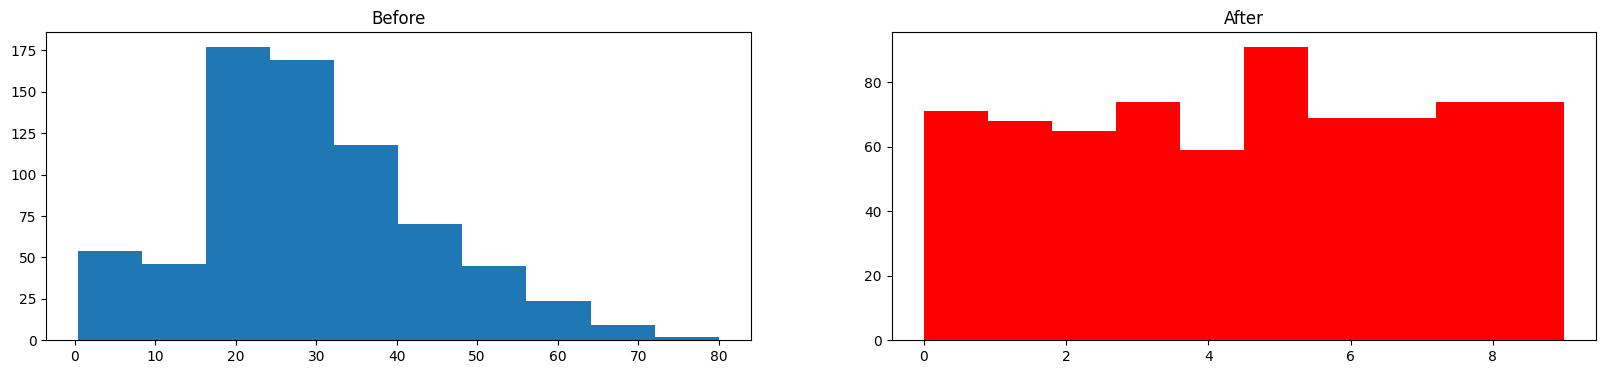

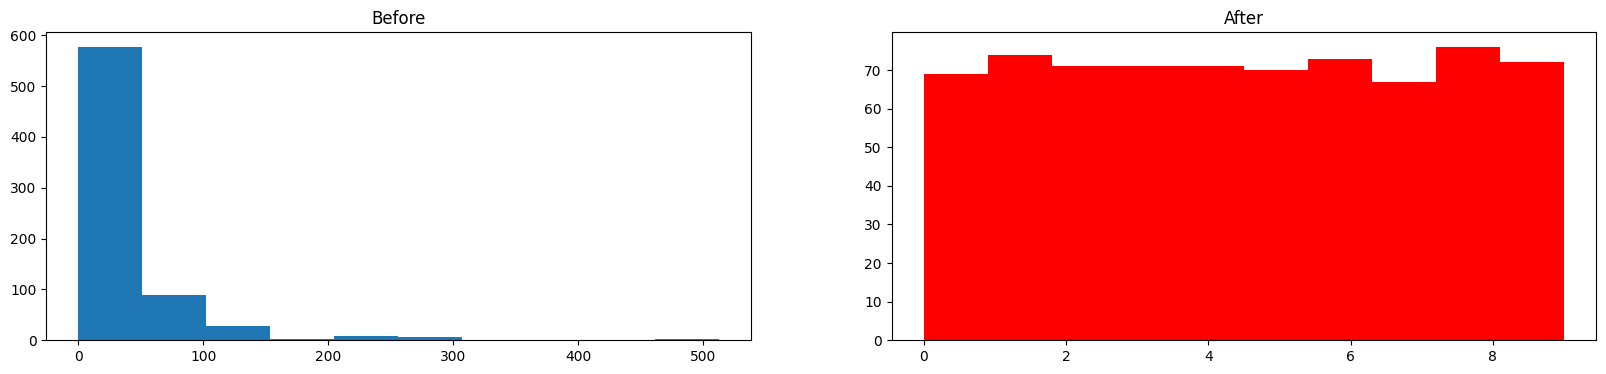

In [66]:
discretize(10,'quantile')

0.6864632237871675


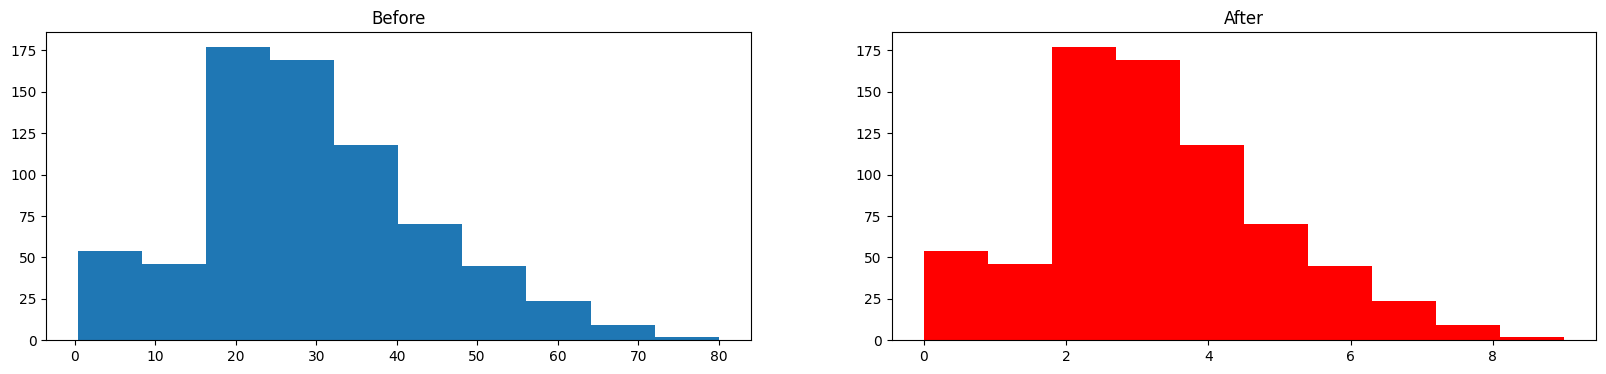

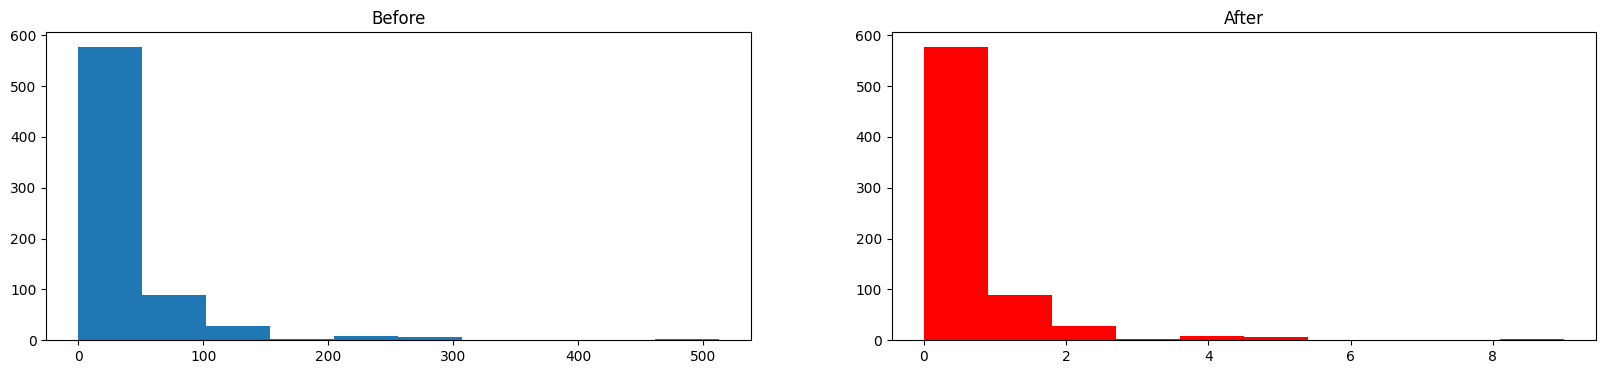

In [67]:
discretize(10,'uniform')

0.6584702660406886


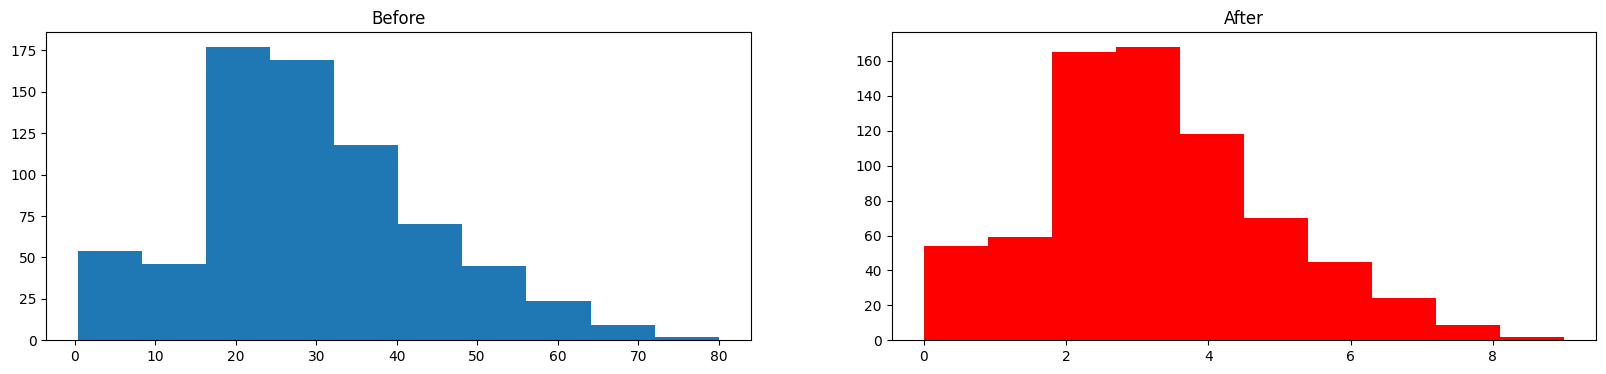

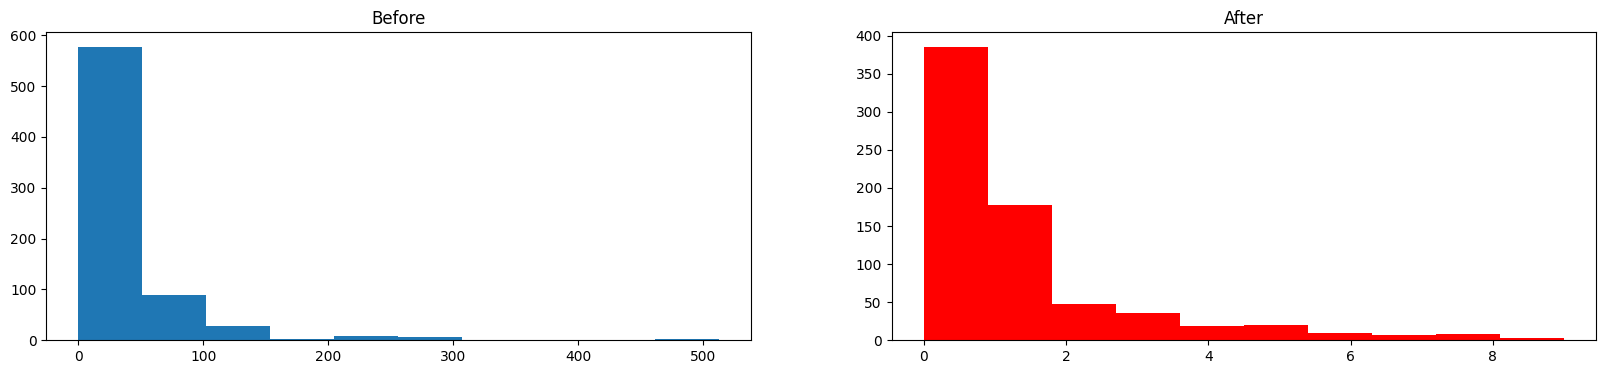

In [68]:
discretize(10,'kmeans')